<a href="https://colab.research.google.com/github/Nkeh/ml-tasks/blob/main/cbir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing needed Package

In [ ]:
!pip install opencv-python

# Imports

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('Corel-1K.zip', 'r')
zip_ref.extractall('dataset')
zip_ref.close()

# Getting our data

In [ ]:
DATASET_PATH = "dataset/Corel-1K"

categories = sorted(os.listdir(DATASET_PATH))
categories


['africans',
 'beaches',
 'buildings',
 'buses',
 'dinosaurs',
 'elephants',
 'flowers',
 'food',
 'horses',
 'mountains']

# Functionn to extract the mean color

In [ ]:
def extract_mean_color(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mean_r = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_b = np.mean(image[:, :, 2])

    return mean_r, mean_g, mean_b

In [ ]:
mean_rgb_data = []

for category in categories:
    category_path = os.path.join(DATASET_PATH, category)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        mean_r, mean_g, mean_b = extract_mean_color(img_path)

        mean_rgb_data.append([
            category, img_name, mean_r, mean_g, mean_b
        ])

mean_rgb_df = pd.DataFrame(
    mean_rgb_data,
    columns=["Category", "Image", "Mean_R", "Mean_G", "Mean_B"]
)

mean_rgb_df.head()


,Category,Image,Mean_R,Mean_G,Mean_B
0,africans,45.jpg,69.028737,58.086477,49.273173
1,africans,38.jpg,85.781535,64.803569,61.557536
2,africans,1.jpg,111.827118,86.920349,79.842499
3,africans,12.jpg,106.589620,80.784698,67.848775
4,africans,57.jpg,92.348633,63.987905,52.009176


In [ ]:
print(mean_rgb_df.shape)
mean_rgb_df.info()

#

(1000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1000 non-null   object 
 1   Image     1000 non-null   object 
 2   Mean_R    1000 non-null   float64
 3   Mean_G    1000 non-null   float64
 4   Mean_B    1000 non-null   float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


# Mean color features per category

In [ ]:
category_mean_rgb = mean_rgb_df.groupby("Category")[["Mean_R", "Mean_G", "Mean_B"]].mean()
category_mean_rgb

,Mean_R,Mean_G,Mean_B
Category,,,
africans,107.337742,91.571015,80.689627
beaches,98.850681,109.457326,116.272847
buildings,97.964699,98.618839,100.875908
buses,101.016494,88.494350,91.721547
dinosaurs,205.121923,200.224578,192.244576
elephants,133.883041,129.352144,113.883714
flowers,83.266781,47.948095,41.445156
food,118.695438,90.292003,70.939335
horses,84.472574,103.190624,58.223524


# Bar Graph

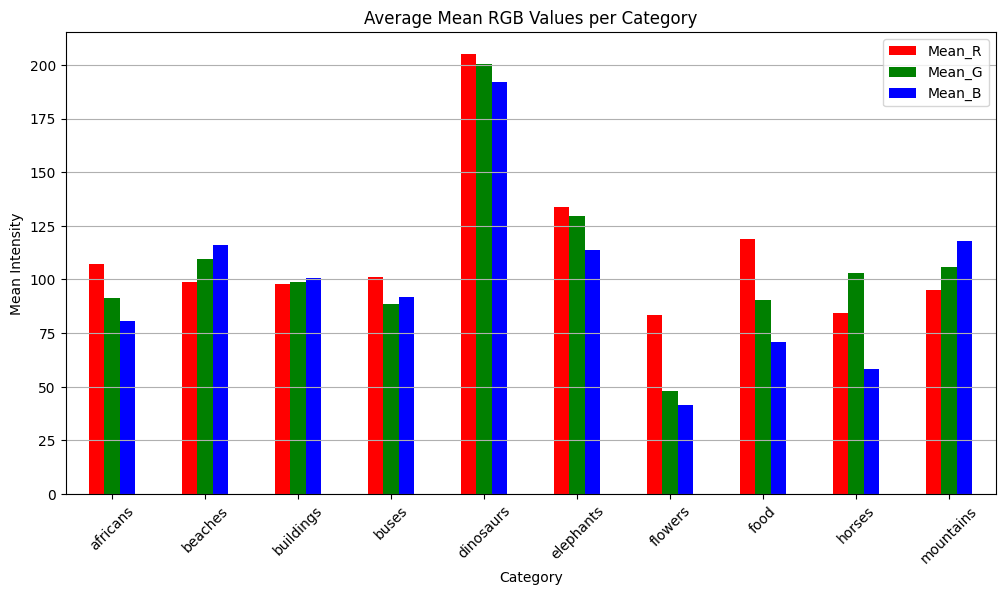

In [ ]:
category_mean_rgb.plot(
    kind="bar",
    figsize=(12, 6),
    color=["red", "green", "blue"]
)

plt.title("Average Mean RGB Values per Category")
plt.ylabel("Mean Intensity")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Histogram Extraction

In [ ]:
def extract_rgb_histogram(image_path, bins=256):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    r_hist = cv2.calcHist([image], [0], None, [bins], [0, 256])
    g_hist = cv2.calcHist([image], [1], None, [bins], [0, 256])
    b_hist = cv2.calcHist([image], [2], None, [bins], [0, 256])

    r_hist = r_hist.flatten()
    g_hist = g_hist.flatten()
    b_hist = b_hist.flatten()

    # Normalize histograms
    r_hist /= r_hist.sum()
    g_hist /= g_hist.sum()
    b_hist /= b_hist.sum()

    return r_hist, g_hist, b_hist


africans 45.jpg


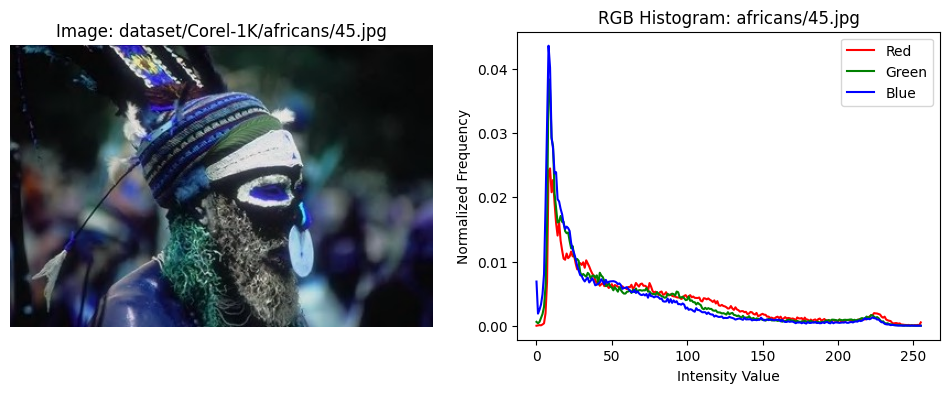

In [ ]:
sample_category = categories[0]
sample_image = os.listdir(os.path.join(DATASET_PATH, sample_category))[0]
sample_image_path = os.path.join(DATASET_PATH, sample_category, sample_image)
image_file = cv2.imread(sample_image_path)

r, g, b = extract_rgb_histogram(sample_image_path)
print(sample_category, sample_image)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Show Image
ax1.imshow(image_file)
ax1.set_title(f"Image: {sample_image_path}")
ax1.axis('off')


ax2.plot(r, color="red", label="Red")
ax2.plot(g, color="green", label="Green")
ax2.plot(b, color="blue", label="Blue")
ax2.set_title(f"RGB Histogram: {sample_category}/{sample_image}") # Corrected line
ax2.set_xlabel("Intensity Value")
ax2.set_ylabel("Normalized Frequency")
ax2.legend()
plt.show()

In [ ]:
category_histograms = {}

for category in categories:
    category_path = os.path.join(DATASET_PATH, category)

    r_hists, g_hists, b_hists = [], [], []

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        r, g, b = extract_rgb_histogram(img_path)
        r_hists.append(r)
        g_hists.append(g)
        b_hists.append(b)

    category_histograms[category] = {
        "R": np.mean(r_hists, axis=0),
        "G": np.mean(g_hists, axis=0),
        "B": np.mean(b_hists, axis=0),
    }


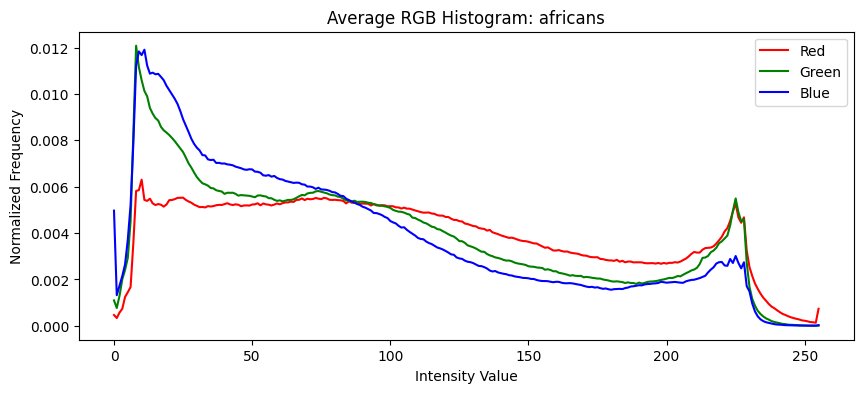

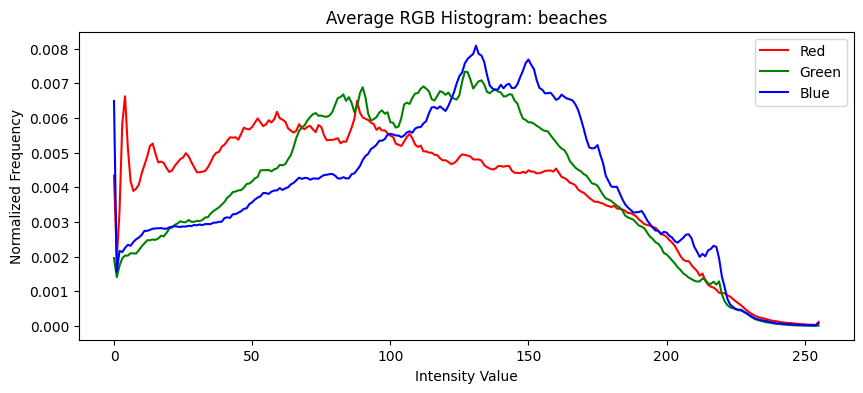

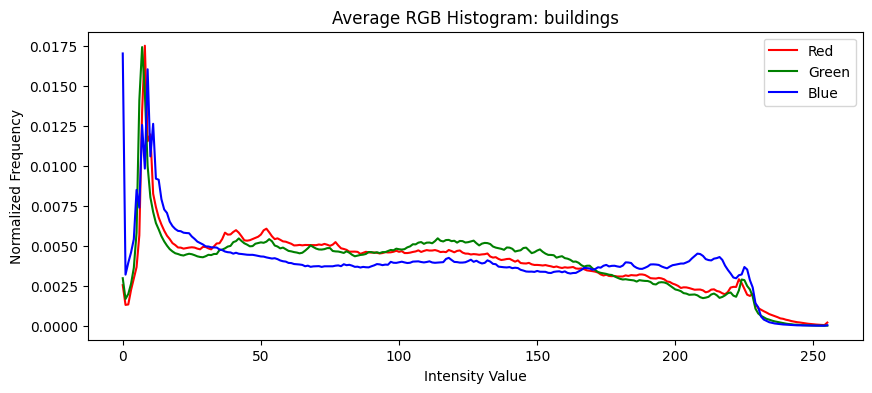

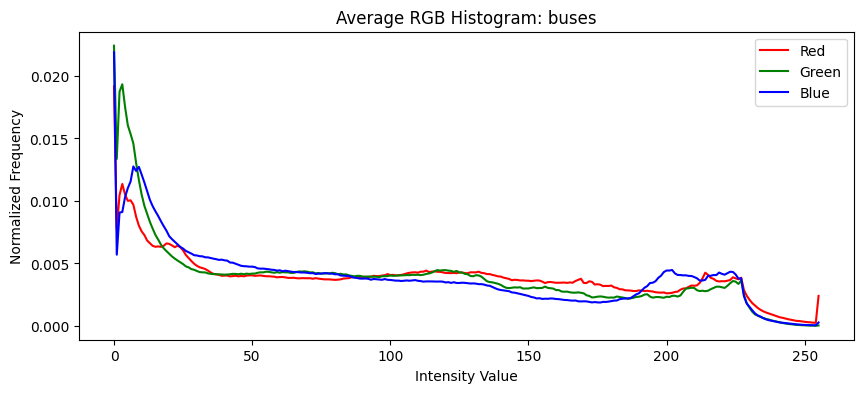

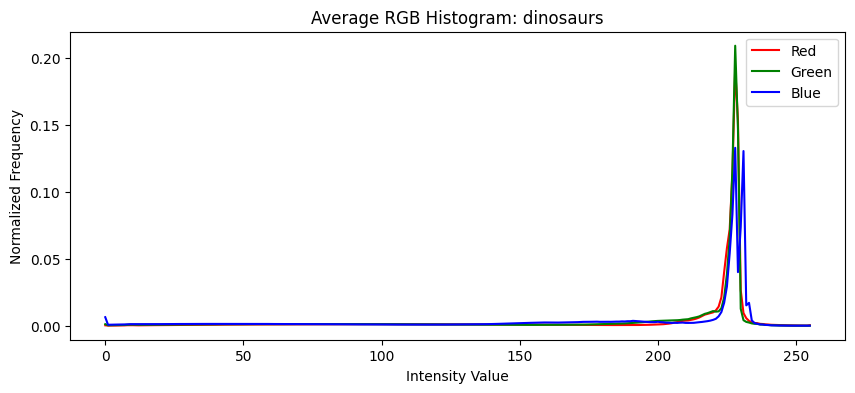

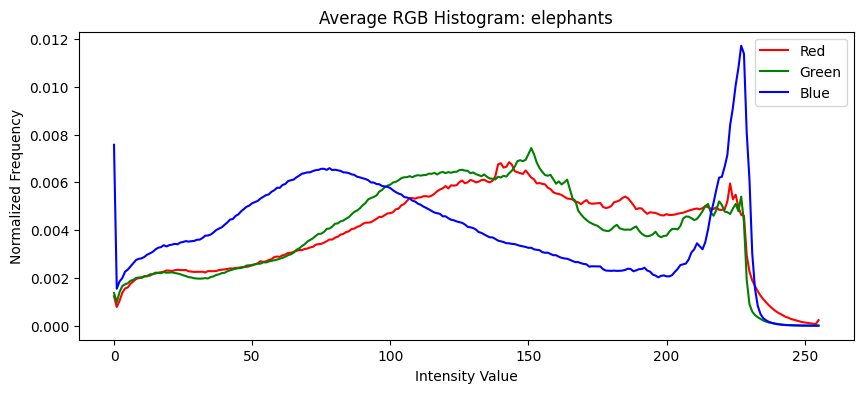

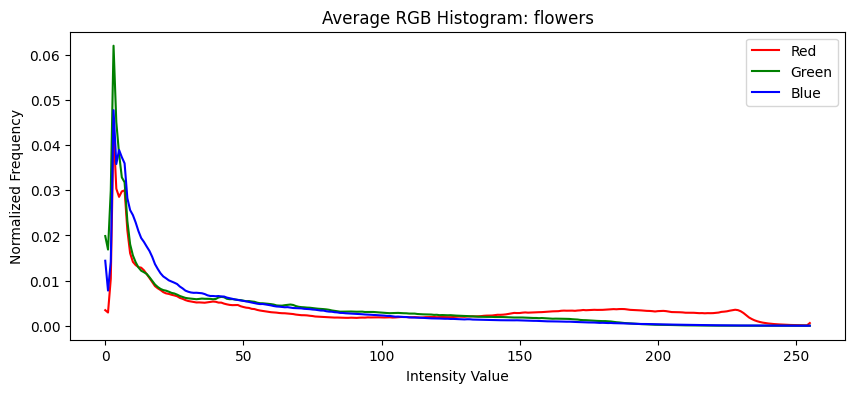

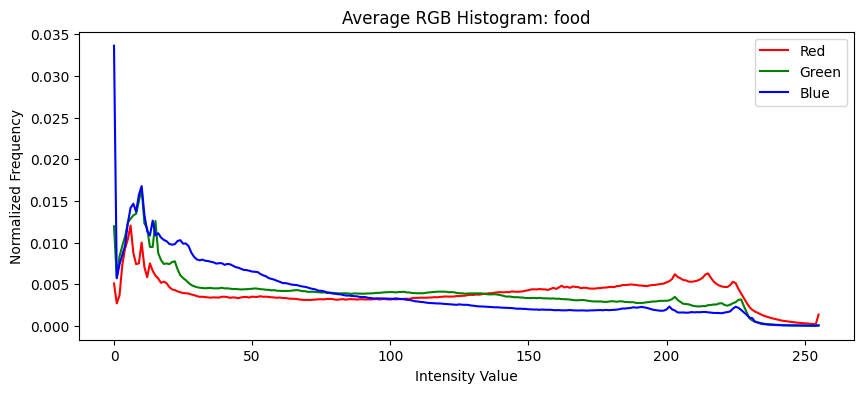

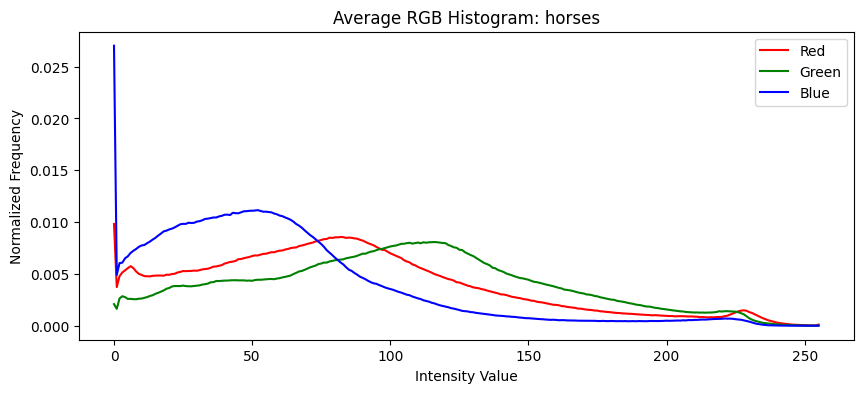

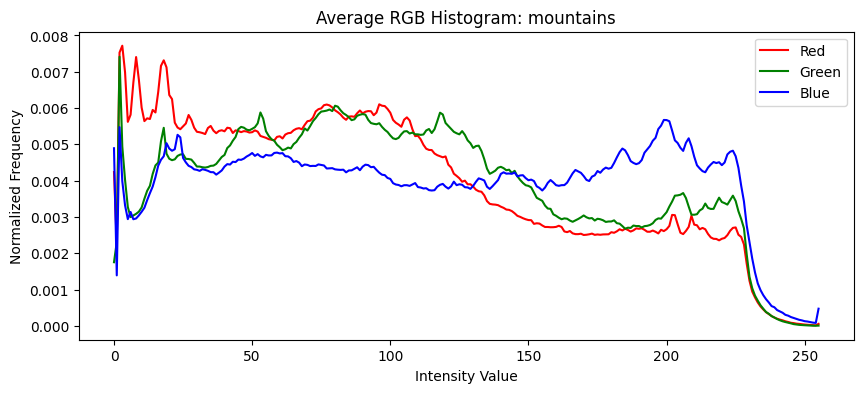

In [ ]:
for category_to_plot in category_histograms:

  hist = category_histograms[category_to_plot]

  plt.figure(figsize=(10, 4))
  plt.plot(hist["R"], color="red", label="Red")
  plt.plot(hist["G"], color="green", label="Green")
  plt.plot(hist["B"], color="blue", label="Blue")
  plt.title(f"Average RGB Histogram: {category_to_plot}")
  plt.xlabel("Intensity Value")
  plt.ylabel("Normalized Frequency")
  plt.legend()
  plt.show()


# Querying similar pictures using the euclidean distance of the feature vectors

In [ ]:
def extract_combined_features(image_path, bins=256):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mean RGB
    mean_r = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_b = np.mean(image[:, :, 2])

    # Histograms
    r_hist = cv2.calcHist([image], [0], None, [bins], [0, 256]).flatten()
    g_hist = cv2.calcHist([image], [1], None, [bins], [0, 256]).flatten()
    b_hist = cv2.calcHist([image], [2], None, [bins], [0, 256]).flatten()

    # Normalize histograms
    r_hist /= r_hist.sum()
    g_hist /= g_hist.sum()
    b_hist /= b_hist.sum()

    # Feature vector
    feature_vector = np.hstack([
        mean_r, mean_g, mean_b,
        r_hist, g_hist, b_hist
    ])

    return feature_vector


In [ ]:
features = []
image_info = []

for category in categories:
    category_path = os.path.join(DATASET_PATH, category)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        feature_vector = extract_combined_features(img_path)

        features.append(feature_vector)
        image_info.append({
            "category": category,
            "path": img_path
        })

features = np.array(features)

print("Total indexed images:", len(features))
print("Feature vector size:", features.shape[1])


Total indexed images: 1000
Feature vector size: 771


In [ ]:
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)


In [ ]:
# query_category = "beaches"  # pick any category
# query_image = os.listdir(os.path.join(DATASET_PATH, query_category))[0]
# query_image_path = os.path.join(DATASET_PATH, query_category, query_image)

query_image_path = 'download.jpg'
query_feature = extract_combined_features(query_image_path)

# query_image_path


In [ ]:
distances = []

for i, feature in enumerate(features):
    dist = euclidean_distance(query_feature, feature)
    distances.append((dist, image_info[i]))

# Sort by similarity (lower distance = more similar)
distances.sort(key=lambda x: x[0])

top_k = 10
retrieved_results = distances[:top_k]

retrieved_results


[(np.float64(17.273073680956546),
  {'category': 'elephants', 'path': 'dataset/Corel-1K/elephants/582.jpg'}),
 (np.float64(18.075221604165332),
  {'category': 'beaches', 'path': 'dataset/Corel-1K/beaches/163.jpg'}),
 (np.float64(21.416458318422467),
  {'category': 'beaches', 'path': 'dataset/Corel-1K/beaches/104.jpg'}),
 (np.float64(23.186303235537018),
  {'category': 'beaches', 'path': 'dataset/Corel-1K/beaches/126.jpg'}),
 (np.float64(24.306943908412318),
  {'category': 'beaches', 'path': 'dataset/Corel-1K/beaches/138.jpg'}),
 (np.float64(28.53708333729907),
  {'category': 'mountains', 'path': 'dataset/Corel-1K/mountains/849.jpg'}),
 (np.float64(28.966221689702515),
  {'category': 'beaches', 'path': 'dataset/Corel-1K/beaches/101.jpg'}),
 (np.float64(29.080157952470778),
  {'category': 'mountains', 'path': 'dataset/Corel-1K/mountains/879.jpg'}),
 (np.float64(29.253054293242243),
  {'category': 'elephants', 'path': 'dataset/Corel-1K/elephants/590.jpg'}),
 (np.float64(29.619840132012403

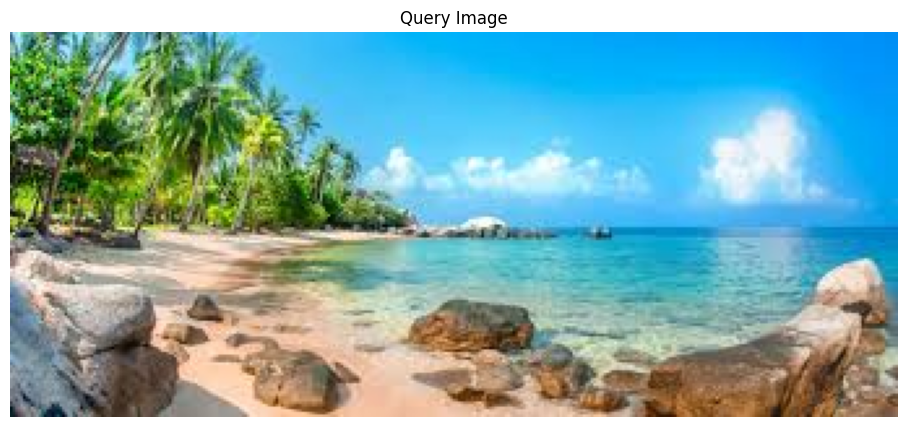

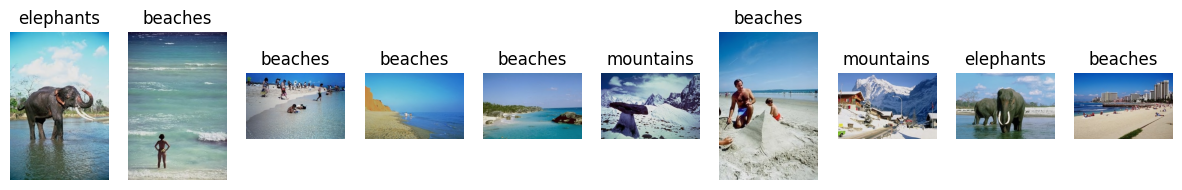

In [ ]:
def show_images(image_paths, titles, cols=10):
    plt.figure(figsize=(15, 5))
    for i, path in enumerate(image_paths):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, cols, i + 1)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

# Query image
show_images(
    [query_image_path],
    ["Query Image"],
    cols=1
)

# Retrieved images
retrieved_paths = [res[1]["path"] for res in retrieved_results]
retrieved_titles = [res[1]["category"] for res in retrieved_results]

show_images(retrieved_paths, retrieved_titles)


# Predicting the category of pictures and querying just from there

In [ ]:
from collections import Counter

def predict_category(query_feature, features, image_info, top_n=10):
    distances = []

    for i, feature in enumerate(features):
        dist = euclidean_distance(query_feature, feature)
        distances.append({
            "distance": dist,
            "category": image_info[i]["category"],
            "path": image_info[i]["path"]
        })

    distances.sort(key=lambda x: x["distance"])

    top_categories = [d["category"] for d in distances[:top_n]]
    predicted_category = Counter(top_categories).most_common(1)[0][0]

    return predicted_category, distances


In [ ]:
predicted_category, all_distances = predict_category(
    query_feature, features, image_info, top_n=10
)

print("Predicted Category:", predicted_category)


Predicted Category: beaches


In [ ]:
def retrieve_from_category(distances, target_category, top_k=5):
    filtered = [
        d for d in distances if d["category"] == target_category
    ]
    return filtered[:top_k]


In [ ]:
final_results = retrieve_from_category(
    all_distances, predicted_category, top_k=10
)

final_results


[{'distance': np.float64(18.075221604165332),
  'category': 'beaches',
  'path': 'dataset/Corel-1K/beaches/163.jpg'},
 {'distance': np.float64(21.416458318422467),
  'category': 'beaches',
  'path': 'dataset/Corel-1K/beaches/104.jpg'},
 {'distance': np.float64(23.186303235537018),
  'category': 'beaches',
  'path': 'dataset/Corel-1K/beaches/126.jpg'},
 {'distance': np.float64(24.306943908412318),
  'category': 'beaches',
  'path': 'dataset/Corel-1K/beaches/138.jpg'},
 {'distance': np.float64(28.966221689702515),
  'category': 'beaches',
  'path': 'dataset/Corel-1K/beaches/101.jpg'},
 {'distance': np.float64(29.619840132012403),
  'category': 'beaches',
  'path': 'dataset/Corel-1K/beaches/106.jpg'},
 {'distance': np.float64(29.99092551873163),
  'category': 'beaches',
  'path': 'dataset/Corel-1K/beaches/117.jpg'},
 {'distance': np.float64(32.54285097108704),
  'category': 'beaches',
  'path': 'dataset/Corel-1K/beaches/159.jpg'},
 {'distance': np.float64(32.9051713143019),
  'category': 

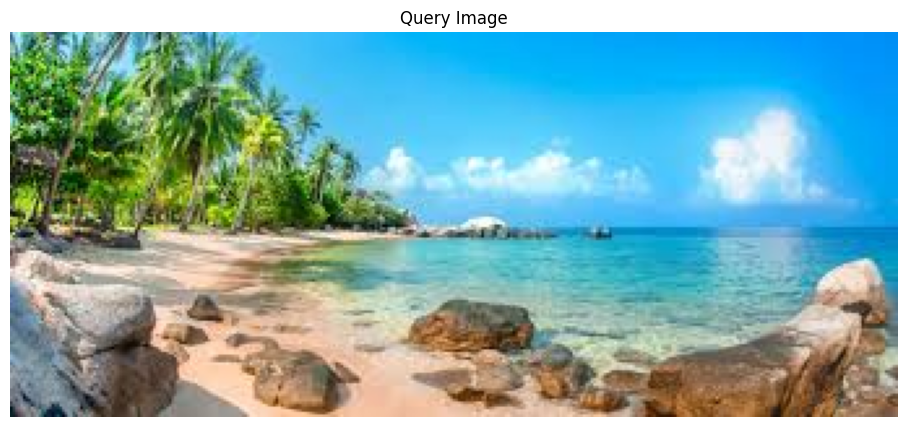

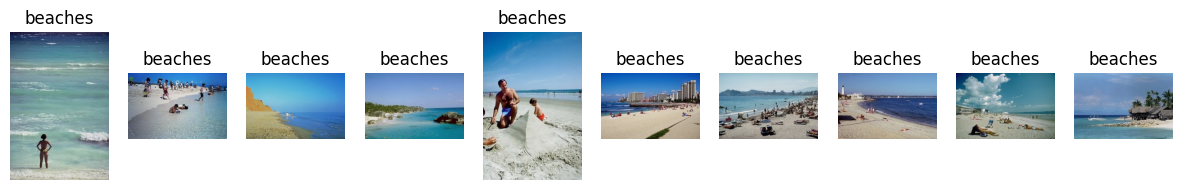

In [ ]:
# Show query image
show_images(
    [query_image_path],
    ["Query Image"],
    cols=1
)

# Show retrieved images
final_paths = [res["path"] for res in final_results]
final_titles = [res["category"] for res in final_results]

show_images(final_paths, final_titles)

